# Peter dan Serigala: Pengantar Pembelajaran Penguatan

Dalam tutorial ini, kita akan belajar bagaimana menerapkan pembelajaran penguatan pada masalah pencarian jalur. Pengaturan ini terinspirasi oleh kisah musikal [Peter dan Serigala](https://en.wikipedia.org/wiki/Peter_and_the_Wolf) karya komposer Rusia [Sergei Prokofiev](https://en.wikipedia.org/wiki/Sergei_Prokofiev). Ini adalah cerita tentang seorang pelopor muda bernama Peter, yang dengan berani keluar dari rumahnya menuju hutan untuk mengejar seekor serigala. Kita akan melatih algoritma pembelajaran mesin yang akan membantu Peter menjelajahi area sekitarnya dan membangun peta navigasi yang optimal.

Pertama, mari kita impor beberapa pustaka yang berguna:


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## Gambaran Umum Pembelajaran Penguatan

**Pembelajaran Penguatan** (RL) adalah teknik pembelajaran yang memungkinkan kita mempelajari perilaku optimal dari **agen** dalam suatu **lingkungan** dengan menjalankan banyak eksperimen. Agen dalam lingkungan ini harus memiliki **tujuan**, yang didefinisikan oleh **fungsi penghargaan**.

## Lingkungan

Untuk menyederhanakan, mari kita anggap dunia Peter sebagai papan persegi berukuran `width` x `height`. Setiap sel di papan ini dapat berupa:
* **tanah**, tempat Peter dan makhluk lainnya dapat berjalan
* **air**, yang jelas tidak bisa dilalui
* **pohon** atau **rumput** - tempat di mana kamu bisa beristirahat
* **apel**, yang mewakili sesuatu yang Peter senang temukan untuk mengisi perutnya
* **serigala**, yang berbahaya dan harus dihindari

Untuk bekerja dengan lingkungan ini, kita akan mendefinisikan sebuah kelas bernama `Board`. Agar notebook ini tidak terlalu penuh, kita telah memindahkan semua kode untuk bekerja dengan papan ke dalam modul terpisah bernama `rlboard`, yang sekarang akan kita impor. Kamu dapat melihat isi modul ini untuk mendapatkan lebih banyak detail tentang implementasi internalnya.


Mari kita buat papan acak dan lihat bagaimana tampilannya:


In [4]:
# code block 1

## Tindakan dan Kebijakan

Dalam contoh kita, tujuan Peter adalah menemukan sebuah apel, sambil menghindari serigala dan rintangan lainnya. Definisikan tindakan-tindakan tersebut sebagai sebuah kamus, dan hubungkan mereka dengan pasangan perubahan koordinat yang sesuai.


In [5]:
# code block 2

Strategi agen kita (Peter) didefinisikan oleh apa yang disebut sebagai **kebijakan**. Mari kita pertimbangkan kebijakan paling sederhana yang disebut **jalan acak**.

## Jalan acak

Mari kita selesaikan masalah kita terlebih dahulu dengan menerapkan strategi jalan acak.


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## Fungsi Reward

Untuk membuat kebijakan kita lebih cerdas, kita perlu memahami langkah mana yang "lebih baik" dibandingkan yang lain.


In [8]:
#code block 5

## Q-Learning

Buat Q-Table, atau array multi-dimensi. Karena papan kita memiliki dimensi `width` x `height`, kita dapat merepresentasikan Q-Table dengan array numpy dengan bentuk `width` x `height` x `len(actions)`:


In [9]:
# code block 6

Lewati Q-Table ke fungsi `plot` untuk memvisualisasikan tabel di papan:


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## Esensi Q-Learning: Persamaan Bellman dan Algoritma Pembelajaran

Tulis pseudo-code untuk algoritma pembelajaran kita:

* Inisialisasi Q-Table Q dengan nilai yang sama untuk semua state dan aksi
* Tetapkan tingkat pembelajaran $\alpha\leftarrow 1$
* Ulangi simulasi berkali-kali
   1. Mulai dari posisi acak
   1. Ulangi
        1. Pilih aksi $a$ pada state $s$
        2. Lakukan aksi dengan berpindah ke state baru $s'$
        3. Jika kita menemui kondisi akhir permainan, atau total reward terlalu kecil - keluar dari simulasi  
        4. Hitung reward $r$ pada state baru
        5. Perbarui Q-Function sesuai dengan persamaan Bellman: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$
        7. Perbarui total reward dan kurangi $\alpha$.

## Eksploitasi vs. Eksplorasi

Pendekatan terbaik adalah menyeimbangkan antara eksplorasi dan eksploitasi. Saat kita semakin memahami lingkungan kita, kita akan lebih cenderung mengikuti jalur optimal, namun tetap memilih jalur yang belum dijelajahi sesekali.

## Implementasi Python

Sekarang kita siap untuk mengimplementasikan algoritma pembelajaran. Sebelum itu, kita juga memerlukan beberapa fungsi yang akan mengubah angka sembarang dalam Q-Table menjadi vektor probabilitas untuk aksi yang sesuai:


In [10]:
# code block 7

Kami menambahkan sejumlah kecil `eps` ke vektor asli untuk menghindari pembagian dengan 0 dalam kasus awal, ketika semua komponen vektor identik.

Algoritma pembelajaran yang sebenarnya akan dijalankan selama 5000 percobaan, yang juga disebut **epoch**:


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

Setelah menjalankan algoritma ini, Q-Table harus diperbarui dengan nilai-nilai yang menentukan daya tarik dari berbagai tindakan di setiap langkah. Visualisasikan tabel di sini:


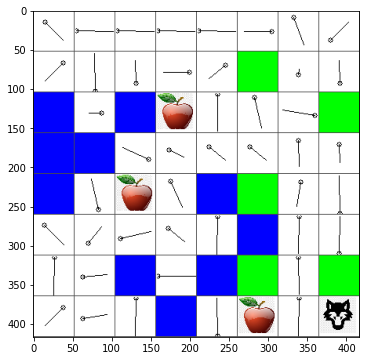

In [43]:
m.plot(Q)

## Memeriksa Kebijakan

Karena Q-Table mencantumkan "daya tarik" dari setiap tindakan di setiap keadaan, sangat mudah untuk menggunakannya untuk menentukan navigasi yang efisien di dunia kita. Dalam kasus paling sederhana, kita cukup memilih tindakan yang sesuai dengan nilai Q-Table tertinggi:


In [13]:
# code block 9

2

Jika Anda mencoba kode di atas beberapa kali, Anda mungkin memperhatikan bahwa terkadang kode tersebut hanya "macet", dan Anda perlu menekan tombol STOP di notebook untuk menghentikannya.

> **Tugas 1:** Modifikasi fungsi `walk` untuk membatasi panjang maksimum jalur dengan sejumlah langkah tertentu (misalnya, 100), dan perhatikan kode di atas mengembalikan nilai ini dari waktu ke waktu.

> **Tugas 2:** Modifikasi fungsi `walk` sehingga tidak kembali ke tempat-tempat yang sudah pernah dikunjungi sebelumnya. Ini akan mencegah `walk` berputar-putar, namun, agen masih bisa berakhir "terjebak" di lokasi yang tidak dapat ia tinggalkan.


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


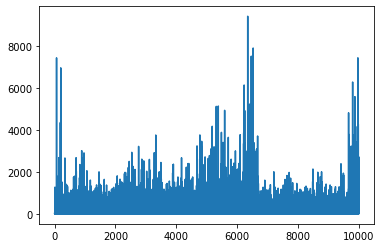

In [57]:
plt.plot(lpath)

## Latihan
## Dunia Peter dan Serigala yang Lebih Realistis



---

**Penafian**:  
Dokumen ini telah diterjemahkan menggunakan layanan penerjemahan AI [Co-op Translator](https://github.com/Azure/co-op-translator). Meskipun kami berusaha untuk memberikan hasil yang akurat, harap diingat bahwa terjemahan otomatis mungkin mengandung kesalahan atau ketidakakuratan. Dokumen asli dalam bahasa aslinya harus dianggap sebagai sumber yang otoritatif. Untuk informasi yang bersifat kritis, disarankan menggunakan jasa penerjemahan profesional oleh manusia. Kami tidak bertanggung jawab atas kesalahpahaman atau penafsiran yang keliru yang timbul dari penggunaan terjemahan ini.
